# Prueba 1 Análisis de Sentimientos de Twitter 
## Hurtado, Escobar, Bustamante - Grupo: Los Mashin Lerning

# HITO 1 :  Puntos 1 y 2

# 1. Análisis Exploratorio


###  ➤ Importamos las librerías clásicas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# estilo grafico
plt.style.use('seaborn-darkgrid')

# para ignorar los warnings
import warnings
warnings.filterwarnings('ignore')

# importamos archivo auxiliar con funciones propias
import function_tweet as func

### ➤ Leemos el archivo y realizamos análisis exploratorio de las variables

In [2]:
# creamos objeto que contiene la base de datos
df = pd.read_csv('text_emotion.csv')

In [3]:
# Exploramos la data con un head
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


Podemos observar que la data contiene variables numericas y categóricas:

* __tweet_id__ = Numero de identificación atribuído al tweet.
* __sentiment__ = Sentimiento atribuído al tweet
* __author__ = Nombre del autor del tweet
* __content__ = Contenido del tweet.

In [4]:
# dimensiones de la data
df.shape

(40000, 4)

In [5]:
# Aplicamos un info para ver si hay datos nulos y mas detalles de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
tweet_id     40000 non-null int64
sentiment    40000 non-null object
author       40000 non-null object
content      40000 non-null object
dtypes: int64(1), object(3)
memory usage: 1.2+ MB


No se observan datos nulos, la variable __tweet_id__ es tipo __int__ (entero, numérica), mientras que __sentiment, author__ y __content__ son tipo __object__ (objeto, categóricas).

### ➤ Identificación del Vector Objetivo

El objetivo del estudio es alcanzar el mejor desempeño posible para __clasificar si un tweet es positivo o negativo__.
En base a esto se ha determinado que el vector objetivo es la columna __'sentiment'__. Se le realizará una tabla de frecuencias y un grafico de barras

In [6]:
# Hacemos un value counts para ver la frecuencia de cada categoria de sentimiento
df['sentiment'].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

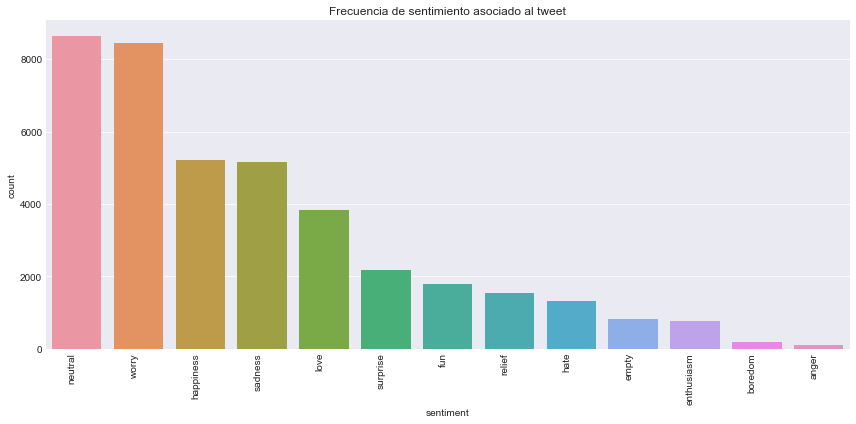

In [7]:
# Grafico de frecuencias
freq = df['sentiment'].value_counts()
plt.figure(figsize=(12,6))
ax1 = sns.countplot(x='sentiment',data=df,order=freq.index)
plt.title('Frecuencia de sentimiento asociado al tweet')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90,ha='right')
plt.tight_layout()
plt.show()

Existe un desbalance evidente entre las clases a estudiar. Las variables __'neutral'__ y __'worry'__ presentan las frecuencias más altas en la grafica mientras que __'anger'__ y __'boredom'__ las más bajas. 

El objetivo del análisis es clasificar el sentimiento en positivo o negativo. Como se puede observar, aparecen sentimientos positivos, negativos y neutros. Entre los positivos se encuentran: __'happines','love','surprise','fun','relief'__ y __'enthusiasm'__ , mientras que en los negativos están: __'worry', 'sadness', 'hate', 'empty', 'boredom'__ y __'anger'__ . El sentimiento neutro corresponde a la variable __'neutral'__ .

Tanto sentimientos positivos como negativos se componen de 6 categorias. Será necesario recodificar la variable para lograr balancear las clases y obtener mejores resultados.

Posterior al preprocesamiento y recodificación de la data analizaremos los cambios en nuestro vector objetivo.

# 2. Preprocesamiento de la data

Antes de aplicar algun modelo de clasificación es necesario preprocesar la data para obtener mejores resultados


__Pasos a seguir__:

* Borraremos las columnas que no son útiles para nuestro objetivo como 'tweet_id' y 'author'
* Extraeremos los hashtag en una nueva columna llamada __'hashtags'__ 
* Limpiaremos los datos del atributo __'content'__ con la ayuda de expresiones regulares y crearemos la columna __'tweet_text'__
* Tokenizaremos la data y la limpiaremos de stopwords en la columna __token_tweet__ 
* Lemantizamos los datos y crearemos una nueva columna __'lemmatize'__ 
* Finalmente volvemos a convertir los datos en texto para poder trabajar con ellos en la columna __'final_tweet'__

### ➤  Borraremos las columnas que no son relevantes para nuestro análisis

In [8]:
# realizaremos una copia de nuestro con las columnas 'tweet:id' y 'author' borradas
df_copy = df.drop(['tweet_id', 'author'], axis = 1)

In [9]:
# comprobamos con un sample
df_copy.sample()

,sentiment,content
12437,worry,"Internet, you were so fast! And now you are so..."


### ➤  Trabajaremos con las librerias: ntlk , re y string

In [10]:
# importamos las librerías necesarias
import nltk # para procesamiento de lenguaje natural
from nltk.corpus import stopwords # para eliminar palabras de detención del texto
from nltk.stem import  WordNetLemmatizer # para la lematización del texto
from nltk.tokenize import word_tokenize# para tokenizar el texto
from nltk.stem import PorterStemmer # para stemming del texto

import re # para expresiones regulares
import string # para cadenas de texto 

### ➤ Rescatamos los hashtag con nuestra función auxiliar: extract_hashtags

In [11]:
# creamos una nueva columna 'hashtags' con los datos de la columna 'content' procesados en la funcion extract_hashtags
df_copy['hashtags'] = df_copy.apply(lambda row: func.extract_hashtags(row['content']), axis=1)
df_copy[240:250] # visualizamos alguna fila que contenga hashtag para comprobar

,sentiment,content,hashtags
240,neutral,"@Nymo would have been better, IMO, if it let y...",{}
241,neutral,#3wordsaftersex it never started...,{#3wordsaftersex}
242,sadness,sometimes i wish things could go back to the w...,{}
243,worry,I downloaded the new twitterfon update thinkin...,{}
244,empty,@tarng Trudy's off Burnet...the one up north t...,{}
245,sadness,"@kateisbored I feel the same way, but I guess ...",{}
246,happiness,I Can`t do 30 minutes of Treadmill but done 3...,{}
247,worry,i'm sooooooooooooo confused,{}
248,neutral,"With friends like VaikO,Nedumaran, LTTE didn't...",{}
249,worry,"Work day 7 of 7,",{}


### ➤ Limpiamos un poco la data de expresiones regulares con nuestra función auxiliar: regular_clean_tweet

In [12]:
# creamos una nueva columna 'tweet_text' con los ultimos datos procesados en la funcion regular_clean_tweet
df_copy['tweet_text'] = df_copy['content'].apply(func.regular_clean_tweet)
df_copy.head(10)

,sentiment,content,hashtags,tweet_text
0,empty,@tiffanylue i know i was listenin to bad habi...,{},i know i was listenin to bad habit earlier and...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,{},layin n bed with a headache ughh waitin on you...
2,sadness,Funeral ceremony...gloomy friday...,{},funeral ceremony gloomy friday
3,enthusiasm,wants to hang out with friends SOON!,{},wants to hang out with friends soon
4,neutral,@dannycastillo We want to trade with someone w...,{},we want to trade with someone who has houston ...
5,worry,Re-pinging @ghostridah14: why didn't you go to...,{},re pinging why didn t you go to prom bc my bf ...
6,sadness,"I should be sleep, but im not! thinking about ...",{},i should be sleep but im not thinking about an...
7,worry,Hmmm. http://www.djhero.com/ is down,{},hmm is down
8,sadness,@charviray Charlene my love. I miss you,{},charlene my love i miss you
9,sadness,@kelcouch I'm sorry at least it's Friday?,{},i m sorry at least it s friday


### ➤ Tokenizamos y limpiamos de stopwords los atributos con nuestra función auxiliar: token_text


In [13]:
# creamos una nueva columna 'token_tweet' con los ultimos datos procesados en la funcion token_text
df_copy['token_tweet'] = df_copy.apply(lambda row: func.token_text(row['tweet_text']), axis=1)
df_copy.head(10)

,sentiment,content,hashtags,tweet_text,token_tweet
0,empty,@tiffanylue i know i was listenin to bad habi...,{},i know i was listenin to bad habit earlier and...,"[know, listenin, bad, habit, earlier, started,..."
1,sadness,Layin n bed with a headache ughhhh...waitin o...,{},layin n bed with a headache ughh waitin on you...,"[layin, n, bed, headache, ughh, waitin, call]"
2,sadness,Funeral ceremony...gloomy friday...,{},funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]"
3,enthusiasm,wants to hang out with friends SOON!,{},wants to hang out with friends soon,"[wants, hang, friends, soon]"
4,neutral,@dannycastillo We want to trade with someone w...,{},we want to trade with someone who has houston ...,"[want, trade, someone, houston, tickets, one]"
5,worry,Re-pinging @ghostridah14: why didn't you go to...,{},re pinging why didn t you go to prom bc my bf ...,"[pinging, go, prom, bc, bf, like, friends]"
6,sadness,"I should be sleep, but im not! thinking about ...",{},i should be sleep but im not thinking about an...,"[sleep, im, thinking, old, friend, want, marri..."
7,worry,Hmmm. http://www.djhero.com/ is down,{},hmm is down,[hmm]
8,sadness,@charviray Charlene my love. I miss you,{},charlene my love i miss you,"[charlene, love, miss]"
9,sadness,@kelcouch I'm sorry at least it's Friday?,{},i m sorry at least it s friday,"[sorry, least, friday]"


### ➤ Refinamos los atributos a capturar mediante el proceso de lemantización con la función auxiliar: lemmatizer

In [14]:
# creamos una nueva columna 'lemmatize' con los ultimos datos procesados en la funcion lemmatizer
df_copy['lemmatize']= df_copy.apply(lambda row: func.lemmatizer(row['token_tweet']), axis=1)
df_copy.head(10)

,sentiment,content,hashtags,tweet_text,token_tweet,lemmatize
0,empty,@tiffanylue i know i was listenin to bad habi...,{},i know i was listenin to bad habit earlier and...,"[know, listenin, bad, habit, earlier, started,...","[know, listenin, bad, habit, earlier, start, f..."
1,sadness,Layin n bed with a headache ughhhh...waitin o...,{},layin n bed with a headache ughh waitin on you...,"[layin, n, bed, headache, ughh, waitin, call]","[layin, n, bed, headache, ughh, waitin, call]"
2,sadness,Funeral ceremony...gloomy friday...,{},funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]","[funeral, ceremony, gloomy, friday]"
3,enthusiasm,wants to hang out with friends SOON!,{},wants to hang out with friends soon,"[wants, hang, friends, soon]","[want, hang, friends, soon]"
4,neutral,@dannycastillo We want to trade with someone w...,{},we want to trade with someone who has houston ...,"[want, trade, someone, houston, tickets, one]","[want, trade, someone, houston, ticket, one]"
5,worry,Re-pinging @ghostridah14: why didn't you go to...,{},re pinging why didn t you go to prom bc my bf ...,"[pinging, go, prom, bc, bf, like, friends]","[ping, go, prom, bc, bf, like, friends]"
6,sadness,"I should be sleep, but im not! thinking about ...",{},i should be sleep but im not thinking about an...,"[sleep, im, thinking, old, friend, want, marri...","[sleep, im, think, old, friend, want, marry, d..."
7,worry,Hmmm. http://www.djhero.com/ is down,{},hmm is down,[hmm],[hmm]
8,sadness,@charviray Charlene my love. I miss you,{},charlene my love i miss you,"[charlene, love, miss]","[charlene, love, miss]"
9,sadness,@kelcouch I'm sorry at least it's Friday?,{},i m sorry at least it s friday,"[sorry, least, friday]","[sorry, least, friday]"


### ➤ Seguimos refinando los atributos mediante el proceso de stemming con la función auxiliar: stemming

In [15]:
# creamos una nueva columna 'stemming' con los ultimos datos procesados en la funcion stemming
df_copy['stemming']= df_copy.apply(lambda row: func.stemming(row['lemmatize']), axis=1)
df_copy.head(10)

,sentiment,content,hashtags,tweet_text,token_tweet,lemmatize,stemming
0,empty,@tiffanylue i know i was listenin to bad habi...,{},i know i was listenin to bad habit earlier and...,"[know, listenin, bad, habit, earlier, started,...","[know, listenin, bad, habit, earlier, start, f...","[know, listenin, bad, habit, earlier, start, f..."
1,sadness,Layin n bed with a headache ughhhh...waitin o...,{},layin n bed with a headache ughh waitin on you...,"[layin, n, bed, headache, ughh, waitin, call]","[layin, n, bed, headache, ughh, waitin, call]","[layin, n, bed, headach, ughh, waitin, call]"
2,sadness,Funeral ceremony...gloomy friday...,{},funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]","[funeral, ceremony, gloomy, friday]","[funer, ceremoni, gloomi, friday]"
3,enthusiasm,wants to hang out with friends SOON!,{},wants to hang out with friends soon,"[wants, hang, friends, soon]","[want, hang, friends, soon]","[want, hang, friend, soon]"
4,neutral,@dannycastillo We want to trade with someone w...,{},we want to trade with someone who has houston ...,"[want, trade, someone, houston, tickets, one]","[want, trade, someone, houston, ticket, one]","[want, trade, someon, houston, ticket, one]"
5,worry,Re-pinging @ghostridah14: why didn't you go to...,{},re pinging why didn t you go to prom bc my bf ...,"[pinging, go, prom, bc, bf, like, friends]","[ping, go, prom, bc, bf, like, friends]","[ping, go, prom, bc, bf, like, friend]"
6,sadness,"I should be sleep, but im not! thinking about ...",{},i should be sleep but im not thinking about an...,"[sleep, im, thinking, old, friend, want, marri...","[sleep, im, think, old, friend, want, marry, d...","[sleep, im, think, old, friend, want, marri, d..."
7,worry,Hmmm. http://www.djhero.com/ is down,{},hmm is down,[hmm],[hmm],[hmm]
8,sadness,@charviray Charlene my love. I miss you,{},charlene my love i miss you,"[charlene, love, miss]","[charlene, love, miss]","[charlen, love, miss]"
9,sadness,@kelcouch I'm sorry at least it's Friday?,{},i m sorry at least it s friday,"[sorry, least, friday]","[sorry, least, friday]","[sorri, least, friday]"


### ➤ Convertimos las listas de tokens en texto para poder trabajar sobre ellas con la función auxiliar: str_word

In [16]:
# creamos una nueva columna 'final_tweet' con los ultimos datos procesados en la función str_word
df_copy['final_tweet']= df_copy.apply(lambda row: func.str_word(row['stemming']), axis=1)
df_copy.head(10)

,sentiment,content,hashtags,tweet_text,token_tweet,lemmatize,stemming,final_tweet
0,empty,@tiffanylue i know i was listenin to bad habi...,{},i know i was listenin to bad habit earlier and...,"[know, listenin, bad, habit, earlier, started,...","[know, listenin, bad, habit, earlier, start, f...","[know, listenin, bad, habit, earlier, start, f...",know listenin bad habit earlier start freakin ...
1,sadness,Layin n bed with a headache ughhhh...waitin o...,{},layin n bed with a headache ughh waitin on you...,"[layin, n, bed, headache, ughh, waitin, call]","[layin, n, bed, headache, ughh, waitin, call]","[layin, n, bed, headach, ughh, waitin, call]",layin n bed headach ughh waitin call
2,sadness,Funeral ceremony...gloomy friday...,{},funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]","[funeral, ceremony, gloomy, friday]","[funer, ceremoni, gloomi, friday]",funer ceremoni gloomi friday
3,enthusiasm,wants to hang out with friends SOON!,{},wants to hang out with friends soon,"[wants, hang, friends, soon]","[want, hang, friends, soon]","[want, hang, friend, soon]",want hang friend soon
4,neutral,@dannycastillo We want to trade with someone w...,{},we want to trade with someone who has houston ...,"[want, trade, someone, houston, tickets, one]","[want, trade, someone, houston, ticket, one]","[want, trade, someon, houston, ticket, one]",want trade someon houston ticket one
5,worry,Re-pinging @ghostridah14: why didn't you go to...,{},re pinging why didn t you go to prom bc my bf ...,"[pinging, go, prom, bc, bf, like, friends]","[ping, go, prom, bc, bf, like, friends]","[ping, go, prom, bc, bf, like, friend]",ping go prom bc bf like friend
6,sadness,"I should be sleep, but im not! thinking about ...",{},i should be sleep but im not thinking about an...,"[sleep, im, thinking, old, friend, want, marri...","[sleep, im, think, old, friend, want, marry, d...","[sleep, im, think, old, friend, want, marri, d...",sleep im think old friend want marri damn want...
7,worry,Hmmm. http://www.djhero.com/ is down,{},hmm is down,[hmm],[hmm],[hmm],hmm
8,sadness,@charviray Charlene my love. I miss you,{},charlene my love i miss you,"[charlene, love, miss]","[charlene, love, miss]","[charlen, love, miss]",charlen love miss
9,sadness,@kelcouch I'm sorry at least it's Friday?,{},i m sorry at least it s friday,"[sorry, least, friday]","[sorry, least, friday]","[sorri, least, friday]",sorri least friday


# Frecuencia de ocurrencia

### ➤ Obtendremos la ocurrencia de cada palabra con sklearn.feature_extraction.text

Usaremos la función CountVectorizer de SciKit Learn que convierte una colección de documentos de texto en una matriz de conteos de tokens.

In [17]:
# Importamos la clase CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
# Aplicamos la clase para extraer las palabras mas repetidas
count_vectorizer = CountVectorizer(stop_words='english')

lista = df_copy['final_tweet']
count_vectorizer_fit = count_vectorizer.fit_transform(lista)
words = count_vectorizer.get_feature_names()
words_freq = count_vectorizer_fit.toarray().sum(axis=0)

lista1=list(zip(words,words_freq))
df_freq = pd.DataFrame(lista1)
df_freq.columns = ['Word', 'Freq']
df_freq = df_freq.sort_values('Freq',ascending=False)

### ➤ Consultamos las 15 palabras más repetidas

In [19]:
df_freq.head(15)

,Word,Freq
4492,day,3631
7424,good,2372
20651,work,2207
10820,love,2149
10539,like,2084
18629,today,1675
18383,think,1601
18533,time,1588
10042,know,1506
7968,happi,1505


### ➤ Graficamos la tabla anterior

In [20]:
df_new = df_freq.head(15)

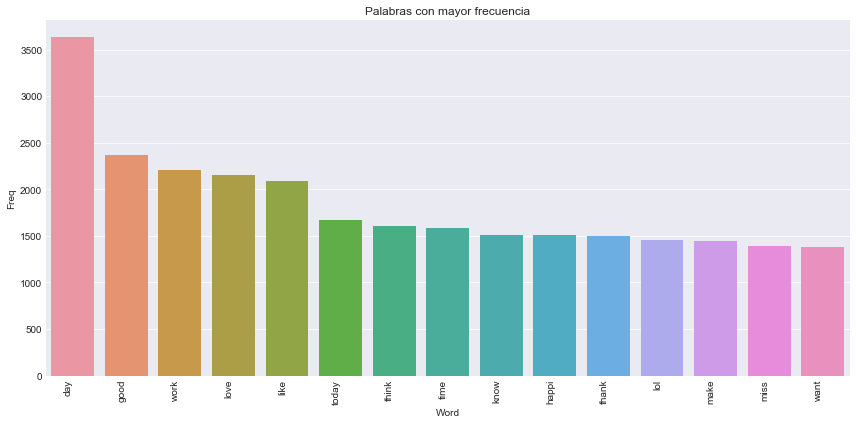

In [21]:
plt.figure(figsize=(12,6))
ax1 = sns.barplot(df_new['Word'], df_new['Freq'])
plt.title('Palabras con mayor frecuencia')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90,ha='right')
plt.tight_layout()
plt.show()

Como podemos observar las palabras mas repetidas dentro de los tweets son palabras cortas. Lideran el ranking: __'day', 'good', 'work', 'like' y 'love'__ .

# Hito 2: Puntos 3 y 4

# 3. Recodificación

### ➤ Recodificaremos la variable sentiment con la función auxiliar: record_sent

Nos interesa trabajar con dos tipos de emociones: positivas o negativas. Para ello generaremos la recodificación de cada una de las clases en una de las dos emociones. La clase neutral será clasificada de forma aleatoria.

In [22]:
# creamos una nueva columna 'recodification' con los ultimos datos procesados en la función recod_sent
df_copy['recodification'] = np.vectorize(func.record_sent)(df_copy['sentiment'])
df_copy.head(10)

,sentiment,content,hashtags,tweet_text,token_tweet,lemmatize,stemming,final_tweet,recodification
0,empty,@tiffanylue i know i was listenin to bad habi...,{},i know i was listenin to bad habit earlier and...,"[know, listenin, bad, habit, earlier, started,...","[know, listenin, bad, habit, earlier, start, f...","[know, listenin, bad, habit, earlier, start, f...",know listenin bad habit earlier start freakin ...,Negative
1,sadness,Layin n bed with a headache ughhhh...waitin o...,{},layin n bed with a headache ughh waitin on you...,"[layin, n, bed, headache, ughh, waitin, call]","[layin, n, bed, headache, ughh, waitin, call]","[layin, n, bed, headach, ughh, waitin, call]",layin n bed headach ughh waitin call,Negative
2,sadness,Funeral ceremony...gloomy friday...,{},funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]","[funeral, ceremony, gloomy, friday]","[funer, ceremoni, gloomi, friday]",funer ceremoni gloomi friday,Negative
3,enthusiasm,wants to hang out with friends SOON!,{},wants to hang out with friends soon,"[wants, hang, friends, soon]","[want, hang, friends, soon]","[want, hang, friend, soon]",want hang friend soon,Positive
4,neutral,@dannycastillo We want to trade with someone w...,{},we want to trade with someone who has houston ...,"[want, trade, someone, houston, tickets, one]","[want, trade, someone, houston, ticket, one]","[want, trade, someon, houston, ticket, one]",want trade someon houston ticket one,Positive
5,worry,Re-pinging @ghostridah14: why didn't you go to...,{},re pinging why didn t you go to prom bc my bf ...,"[pinging, go, prom, bc, bf, like, friends]","[ping, go, prom, bc, bf, like, friends]","[ping, go, prom, bc, bf, like, friend]",ping go prom bc bf like friend,Negative
6,sadness,"I should be sleep, but im not! thinking about ...",{},i should be sleep but im not thinking about an...,"[sleep, im, thinking, old, friend, want, marri...","[sleep, im, think, old, friend, want, marry, d...","[sleep, im, think, old, friend, want, marri, d...",sleep im think old friend want marri damn want...,Negative
7,worry,Hmmm. http://www.djhero.com/ is down,{},hmm is down,[hmm],[hmm],[hmm],hmm,Negative
8,sadness,@charviray Charlene my love. I miss you,{},charlene my love i miss you,"[charlene, love, miss]","[charlene, love, miss]","[charlen, love, miss]",charlen love miss,Negative
9,sadness,@kelcouch I'm sorry at least it's Friday?,{},i m sorry at least it s friday,"[sorry, least, friday]","[sorry, least, friday]","[sorri, least, friday]",sorri least friday,Negative


### ➤ Observamos la frecuencia del vector objetivo recodificado

In [23]:
# Frecuencia
df_copy['recodification'].value_counts()

Negative    22948
Positive    17052
Name: recodification, dtype: int64

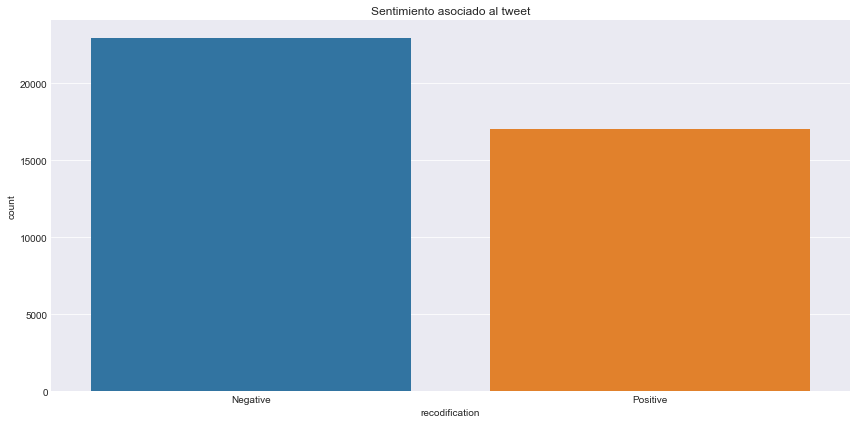

In [24]:
# Grafico
freq = df_copy['recodification'].value_counts()
plt.figure(figsize=(12,6))
ax1 = sns.countplot(x='recodification',data=df_copy,order=freq.index)
plt.title('Sentimiento asociado al tweet')
ax1.set_xticklabels(ax1.get_xticklabels())
plt.tight_layout()
plt.show()

Como podemos observar, existen más tweets clasificados como negativos que positivos, y si lo contrastamos con la gráfica que esta en análisis exploratorio (antes de recodificar), es evidente que esto podria suceder ya que las frecuencias mas altas las tienen __'neutral'__, que fue clasificado de manera aleatoria y __'worry'__ que es negativa. 

# 4. Entrenamiento de modelos



### ➤ Utilizaremos un modelo base de entrenamiento y validación 


Binarizaremos la variable objetivo:

* Sentimiento Positivo = 1
* Sentimiento Negativo = -1

In [25]:
# binarizamos el vector objetivo para facilitar el modelamiento 1=Positivo; -1 = Negativo
df_copy['recodification_2'] = np.where(df_copy['recodification'] == 'Positive', 1, -1)

In [26]:
df_copy['recodification_2'].value_counts()

-1    22948
 1    17052
Name: recodification_2, dtype: int64

In [27]:
df_copy.head()

,sentiment,content,hashtags,tweet_text,token_tweet,lemmatize,stemming,final_tweet,recodification,recodification_2
0,empty,@tiffanylue i know i was listenin to bad habi...,{},i know i was listenin to bad habit earlier and...,"[know, listenin, bad, habit, earlier, started,...","[know, listenin, bad, habit, earlier, start, f...","[know, listenin, bad, habit, earlier, start, f...",know listenin bad habit earlier start freakin ...,Negative,-1
1,sadness,Layin n bed with a headache ughhhh...waitin o...,{},layin n bed with a headache ughh waitin on you...,"[layin, n, bed, headache, ughh, waitin, call]","[layin, n, bed, headache, ughh, waitin, call]","[layin, n, bed, headach, ughh, waitin, call]",layin n bed headach ughh waitin call,Negative,-1
2,sadness,Funeral ceremony...gloomy friday...,{},funeral ceremony gloomy friday,"[funeral, ceremony, gloomy, friday]","[funeral, ceremony, gloomy, friday]","[funer, ceremoni, gloomi, friday]",funer ceremoni gloomi friday,Negative,-1
3,enthusiasm,wants to hang out with friends SOON!,{},wants to hang out with friends soon,"[wants, hang, friends, soon]","[want, hang, friends, soon]","[want, hang, friend, soon]",want hang friend soon,Positive,1
4,neutral,@dannycastillo We want to trade with someone w...,{},we want to trade with someone who has houston ...,"[want, trade, someone, houston, tickets, one]","[want, trade, someone, houston, ticket, one]","[want, trade, someon, houston, ticket, one]",want trade someon houston ticket one,Positive,1


In [28]:
from sklearn.model_selection import train_test_split # genera matrices de entrenamiento y validación

In [29]:
# Definimos nuestra matriz de atributos
X = count_vectorizer.fit_transform(df_copy["final_tweet"])
# Definimos vector objetivo
y = df_copy['recodification_2']

# Generamos conjunto de entrenamiento (train) y validación (test).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=23748)

##  Modelos a utilizar

Los modelos que utilizaremos para la clasificasión de los tweets serán:

* __Naive Bayes__ =  Muy utilizado y da grandes resultados cuando se usa para clasificación y análisis de texto.
* __Logistic Regression__ =  Es un clasificador lineal binario en donde la variable dependiente es categórica 
* __KNN__ = El algoritmo K-Nearest Neighbors, también llamado KNN, es uno de los más populares para el reconocimiento de patrones y correlaciones.
* __Árboles de decisión__ = El uso de árboles de decisión es bueno para la extracción y clasificación de texto
* __AdaBoost__ =  Es una de las mejores opciones para árboles de decisión binarios de clasificación, muy util en clasificación de texto. 
* __SVM__ = Este algoritmo obtiene el hiperplano más óptimo para una clasificación binaria



### ➤ Realizamos los imports necesarios

In [30]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import classification_report 

### ➤ Instanciamos los modelos a analizar

In [31]:
naive_bayes = MultinomialNB().fit(X_train, y_train)
knn_model = KNeighborsClassifier().fit(X_train, y_train)
logistic_regression = LogisticRegression().fit(X_train, y_train)
tree_class = DecisionTreeClassifier().fit(X_train, y_train)
ada_class = AdaBoostClassifier().fit(X_train, y_train)
SVM_model = SVC().fit(X_train, y_train)

## Métricas

__Precisión (del ingles Precision)__: La precisión mide la proporción de identificaciones positivas que son realmente correctas. Nótese que su valor aumenta a    medida que el número de falsos positivos disminuye



__Exhaustividad (del inglés Recall)__: La  cobertura es  la  proporción  de  elementos  positivos  reales  identificados  acertadamente. También se  puede  ver  como  la  capacidad  que  tiene  el  modelo  de  construir de  manera  correcta las  clases. Cuanto  más  cercano  a  1, mejor  estarán  definidas  las distintas  clases existentes ya  que su  valor aumenta a medida que disminuye el número de falsos negativos

__Valor-F(del inglés F-score)__:Es habitual que para medirla eficiencia de un modelo de clasificación se haga uso de los valores de cobertura y exhaustividad. Para ello, el valor-F se presenta como la media armónica  entre  ambas  medidas  y  suele  utilizarse  como  referencia  para  comparar  el  rendimiento entrevarios modelos. 

__Exactitud(del   inglés  Accuracy)__:Esta  es  la  medida  de  rendimiento  más  simple  e  intuitiva  y representa la razónentre laspredicciones correctassobre el total de predicciones realizadas. Dicho de  otra  manera,  es  el  número  de  elementos  clasificados correctamente entre  el  número  total  de clasificaciones llevadas a cabo.

<img src='02.jpg'>

### ➤ Reportes sin modificar hiperparámetros

__Estrategia para la grilla:__

Se determinara el clasification report sin modificación de hiperparámetros para luego escoger los mejores modelos y pasarlos por la grilla (Esto se debe principalmente a que el código en la grilla tarda mucho en cargar)

In [32]:
models=[naive_bayes,knn_model, logistic_regression, tree_class, ada_class, SVM_model]

nombres=['Naive Bayes','KNN model', 'Logistic Regression', 'Decision Tree Classifier', 'AdaBoost Classifier', 'SVM model']

for i in range(6):
    print('{}'.format(nombres[i]))
    print('=' * 60)
    print(classification_report(y_test, models[i].predict(X_test)))
    print('-' * 60)

Naive Bayes
              precision    recall  f1-score   support

          -1       0.66      0.75      0.70      7577
           1       0.59      0.49      0.54      5623

    accuracy                           0.64     13200
   macro avg       0.63      0.62      0.62     13200
weighted avg       0.63      0.64      0.63     13200

------------------------------------------------------------
KNN model
              precision    recall  f1-score   support

          -1       0.62      0.67      0.65      7577
           1       0.51      0.45      0.48      5623

    accuracy                           0.58     13200
   macro avg       0.57      0.56      0.56     13200
weighted avg       0.57      0.58      0.58     13200

------------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

          -1       0.66      0.74      0.70      7577
           1       0.59      0.49      0.54      5623

    accuracy      

En base al reporte se determinó que los modelos Naive Bayes, Logistic Regression y AdaBoost son los que tienen un mejor f1 (resultado armónico entre precision y recall) y serán los que pasen por el Gridsearch. Profundizaremos en los reportes de clasificación posterior a la grilla.
### ➤ Gridsearch

In [35]:
from sklearn.model_selection import  GridSearchCV

In [53]:
# Modificación de hiperparámetros. Los definimos en base a los mas usados en clases
naive_params = {'alpha': [0.1, 1, 1.5, 5, 10]}
log_params = {'penalty' : ['l1', 'l2'],'C' : [0.001, 0.01, 0.1, 1, 10, 100]}
ada_params = {'learning_rate': [0.01, 0.1, 0.5],'n_estimators': [50, 100, 500, 1000, 2000]}

In [37]:
#Aplicamos Gridsearch con validación cruzada = 2 para que no demore demasiado la grilla
grid_naive = GridSearchCV(naive_bayes, param_grid = naive_params, n_jobs=-1, cv=2 )
grid_log = GridSearchCV(logistic_regression, param_grid = log_params, n_jobs=-1, cv=2 )
grid_ada = GridSearchCV(ada_class, param_grid = ada_params, n_jobs=-1, cv=2 )

In [38]:
# Mejor hiperparámetro para Naive Bayes
grid_naive.fit(X_train, y_train)
grid_naive.best_params_

{'alpha': 1.5}

In [39]:
# Mejor hiperparámetro para Logistic Regression
grid_log.fit(X_train, y_train)
grid_log.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [56]:
# Mejor hiperparámetro para AdaBoost
grid_ada.fit(X_train, y_train)
grid_ada.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000}

In [58]:
# Instanciamos los modelos modificando los hiperparámetros
naive_bayes_best = MultinomialNB(alpha=1.5)
logistic_regression_best = LogisticRegression(C=0.1, penalty= 'l2', random_state=23748)
ada_best = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 2000)

In [61]:
#Entrenamos naive
naive_bayes_best.fit(X_train, y_train)

MultinomialNB(alpha=1.5, class_prior=None, fit_prior=True)

In [62]:
#Entrenamos Logistic
logistic_regression_best.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=23748, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
#Entrenamos Adaboost
ada_best.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=2000, random_state=None)

### ➤ Reportes con hiperparámetros modificados

In [63]:
#Hacemos un nuevo report
models=[naive_bayes_best, logistic_regression_best, ada_best]

nombres=['Naive Bayes','Logistic Regression', 'AdaBoost Classifier']

for i in range(3):
    print('{}'.format(nombres[i]))
    print('=' * 60)
    print(classification_report(y_test, models[i].predict(X_test)))
    print('-' * 60)

Naive Bayes
              precision    recall  f1-score   support

          -1       0.66      0.77      0.71      7577
           1       0.60      0.47      0.53      5623

    accuracy                           0.64     13200
   macro avg       0.63      0.62      0.62     13200
weighted avg       0.63      0.64      0.63     13200

------------------------------------------------------------
Logistic Regression
              precision    recall  f1-score   support

          -1       0.65      0.81      0.73      7577
           1       0.63      0.42      0.50      5623

    accuracy                           0.65     13200
   macro avg       0.64      0.62      0.61     13200
weighted avg       0.64      0.65      0.63     13200

------------------------------------------------------------
AdaBoost Classifier
              precision    recall  f1-score   support

          -1       0.64      0.85      0.73      7577
           1       0.64      0.34      0.45      5623

    accu

Al modificar los hiperparámetros podemos ver que los resultados cambiaron, algunas metricas mejoraron y otras empeoraron. Los modelos tienen un mejor desempeño para predicir correctamente los sentimientos negativos por sobre los positivos, esto se condice con que los negativos son mayoría.

Los tres modelos presentan un precision  mas o menos parecido en positivos(1) y negativos (-1), clasificando las variables de manera correcta sobre un 60% en los tres modelos.

En cuanto al recall, las métricas para clasificar los sentimientos negativos(-1)son bastante buenas superando el 77%, pero deja mucho que desear con respecto a la clasificacion acertada de los sentimientos positivos(1) ya que son numeros bastante bajos, siendo AdaBoost el mas bajo en esta categoría con solo un 34% de aciertos, lo cual indicaría que dentro de los omitidos existe un alto número de falsos negativos.

En cuanto a f1 las metricas son parecidas en los tres modelos, pero adaboost se cae un poco mas en predecir de manera correcta los positivos.

Siempre es bueno graficar el rango de errores con el cual opera nuestro modelo. Para ello vamos a implementar la curva roc que va a aevaluar la relacion entre falsos positivos y falsos negativos. 

### ➤ Curva ROC

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

Auc del modelo: Naive Bayes es 0.68
Auc del modelo: Logistic_regression es 0.7
Auc del modelo: AdaBoost es 0.69


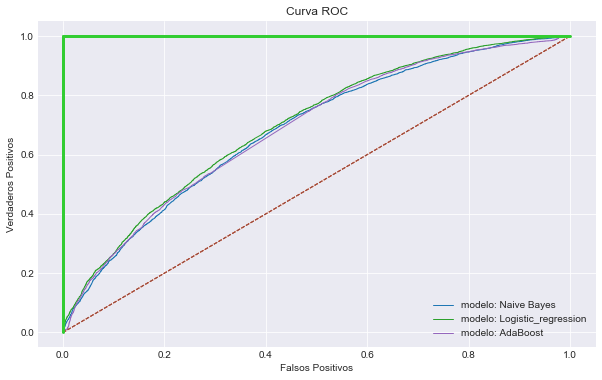

In [69]:
#Curva ROC

plt.rcParams['figure.figsize'] = (10, 6)

models=[naive_bayes_best, logistic_regression_best, ada_best]
   
nombres=['Naive Bayes', 'Logistic_regression', 'AdaBoost']
         
y_hats=[]
indicador1=[]
indicador2=[]
indicador3=[]

#Accuracy
for i in range(3):
    y_hats.append(models[i].predict_proba(X_test)[:,1])
    false_positive, true_positive, threshold = roc_curve(y_test, y_hats [i])
    indicador1.append(false_positive)
    indicador2.append(true_positive)
    indicador3.append(threshold)
    print("Auc del modelo: {} es {}".format(nombres[i],roc_auc_score(y_test, y_hats [i]).round(2)))

#Grafico curva ROC
plt.title('Curva ROC')
for i in range(3): 
    plt.plot(indicador1[i], indicador2[i], lw=1, label="modelo: {}".format(nombres[i]) )
    plt.plot([0, 1], ls="--", lw=1)
plt.plot([0, 0], [1, 0] , c='limegreen', lw=3), plt.plot([1, 1] , c='limegreen', lw=3)
plt.ylabel('Verdaderos Positivos')
plt.xlabel('Falsos Positivos');
plt.legend()

Al analizar los AUC de la curva ROC, podemos observar que Logistic Regression es capaz de clasificar mejor los verdaderos positivos alcanzando un 70%, le siguen AdaBoost con un 69% y luego Naive Bayes con un 68%. Los resultados son bastante parejos.

Lo que me informa el area bajo la curva es que tantos falsos positivos se necesitan para obtener una razon de verdaderos positivos. En el gráfico se observa lo sgte, aproximadamente el 80% de las clasificaciones correctas se obtienen cuando tenemos el 55% aprox. de observaciones incorrectas.



# Hito 3 : Punto 5

En base a que los AUC son muy parejos utilizaremos los resultados de classification report para serializar los dos mejores. 
Si volvemos a los reportes podemos observar que Logistic y Bayes tienden a ser mas equilibrados al clasificar sentimientos tanto positivos como negativos, por esta razón se serializarán ambos

In [71]:
#Serialización de los modelos
import pickle
pickle.dump(logistic_regression_best, open('logistic_Hurtado_Escobar_Bustamante.sav','wb'))
pickle.dump(naive_bayes_best , open('naive_Hurtado_Escobar_Bustamante.sav','wb'))